In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('AirPassengers.csv')

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


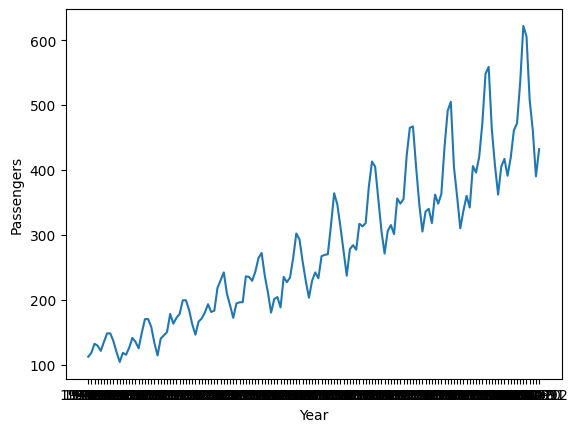

In [4]:
#данные и построим график распределения:


print(df.head())
plt.plot(df['Month'], df['#Passengers'])
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

<ipython-input-5-0a26bad1db0b>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = df.resample('M').sum()


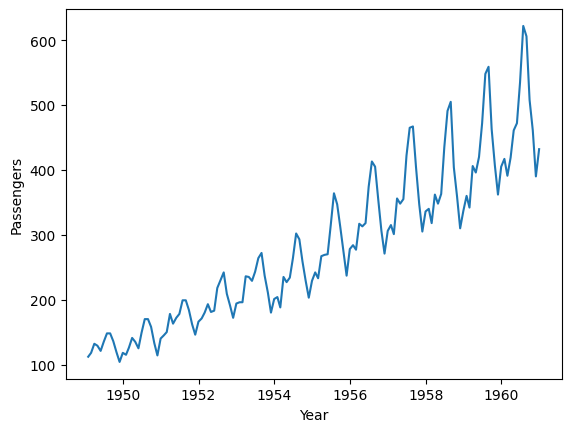

In [5]:
#Если график не приятный, разбить его на интервалы:


df['Date'] = pd.to_datetime(df['Month'])
df.set_index('Date', inplace=True)

monthly = df.resample('M').sum()
plt.plot(monthly)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

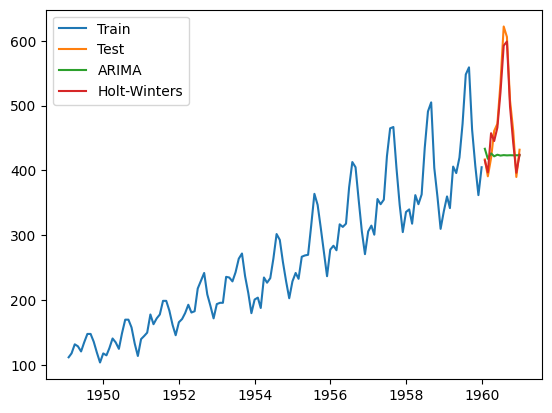

In [10]:
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

train, test = monthly[:-12], monthly[-12:]

model_1 = SARIMAX(train, order=(1,1,1))
model_1_fit = model_1.fit()
pred_1 = model_1_fit.forecast(steps=12)

model_2 = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
model_2_fit = model_2.fit()
pred_2 = model_2_fit.forecast(12)

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred_1, label='ARIMA')
plt.plot(pred_2, label='Holt-Winters')
plt.legend()
plt.show()

In [7]:
#На графике мы можем визуализировать обе модели и отличить их друг от друга.

#Использовать метрики MAE, MAPE и RMSE для оценки точности моделей:


from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_1 = mean_absolute_error(test, pred_1)
mae_2 = mean_absolute_error(test, pred_2)
print("ARIMA MAE:", round(mae_1,2))
print("Holt-Winters MAE:", round(mae_2,2))

mape_1 = np.mean(np.abs((test - pred_1)/test)*100)
mape_2 = np.mean(np.abs((test - pred_2)/test)*100)
print("ARIMA MAPE:", round(mape_1,2))
print("Holt-Winters MAPE:", round(mape_2,2))

rmse_1 = mean_squared_error(test, pred_1, squared=False)
rmse_2 = mean_squared_error(test, pred_2, squared=False)
print("ARIMA RMSE:", round(rmse_1,2))
print("Holt-Winters RMSE:", round(rmse_2,2))

ARIMA MAE: 66.24
Holt-Winters MAE: 13.38
ARIMA MAPE: 1960-01-31 00:00:00   NaN
1960-02-29 00:00:00   NaN
1960-03-31 00:00:00   NaN
1960-04-30 00:00:00   NaN
1960-05-31 00:00:00   NaN
1960-06-30 00:00:00   NaN
1960-07-31 00:00:00   NaN
1960-08-31 00:00:00   NaN
1960-09-30 00:00:00   NaN
1960-10-31 00:00:00   NaN
1960-11-30 00:00:00   NaN
1960-12-31 00:00:00   NaN
#Passengers           NaN
dtype: float64
Holt-Winters MAPE: 1960-01-31 00:00:00   NaN
1960-02-29 00:00:00   NaN
1960-03-31 00:00:00   NaN
1960-04-30 00:00:00   NaN
1960-05-31 00:00:00   NaN
1960-06-30 00:00:00   NaN
1960-07-31 00:00:00   NaN
1960-08-31 00:00:00   NaN
1960-09-30 00:00:00   NaN
1960-10-31 00:00:00   NaN
1960-11-30 00:00:00   NaN
1960-12-31 00:00:00   NaN
#Passengers           NaN
dtype: float64
ARIMA RMSE: 91.23
Holt-Winters RMSE: 16.98


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
